In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio



In [ ]:
# 1️⃣ Load data
df = pd.read_csv("/content/Delhi-Metro-Network.csv")
df['Opening Date'] = pd.to_datetime(df['Opening Date'])
df['Opening Year'] = df['Opening Date'].dt.year


In [ ]:
df.head()

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude,Opening Year
0,1,Jhil Mil,10.3,Red line,2008-04-06,Elevated,28.675790,77.312390,2008
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.671800,77.277560,2018
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.493600,77.093500,2013
3,4,Okhla NSIC,23.8,Magenta line,2017-12-25,Elevated,28.554483,77.264849,2017
4,5,Dwarka Mor,10.2,Blue line,2005-12-30,Elevated,28.619320,77.033260,2005


In [ ]:
df.isnull().sum()

,0
Station ID,0
Station Name,0
Distance from Start (km),0
Line,0
Opening Date,0
Station Layout,0
Latitude,0
Longitude,0
Opening Year,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Station ID                285 non-null    int64         
 1   Station Name              285 non-null    object        
 2   Distance from Start (km)  285 non-null    float64       
 3   Line                      285 non-null    object        
 4   Opening Date              285 non-null    datetime64[ns]
 5   Station Layout            285 non-null    object        
 6   Latitude                  285 non-null    float64       
 7   Longitude                 285 non-null    float64       
 8   Opening Year              285 non-null    int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(3)
memory usage: 19.1+ KB


In [ ]:
df.describe()

,Station ID,Distance from Start (km),Opening Date,Latitude,Longitude,Opening Year
count,285.000000,285.000000,285,285.000000,285.000000,285.000000
mean,143.000000,19.218947,2013-01-23 09:00:37.894736896,28.595428,77.029315,2012.578947
min,1.000000,0.000000,2002-12-24 00:00:00,27.920862,28.698807,2002.000000
25%,72.000000,7.300000,2009-12-11 00:00:00,28.545828,77.107130,2009.000000
50%,143.000000,17.400000,2011-08-15 00:00:00,28.613453,77.207220,2011.000000
75%,214.000000,28.800000,2018-06-08 00:00:00,28.666360,77.281165,2018.000000
max,285.000000,52.700000,2019-09-03 00:00:00,28.878965,77.554479,2019.000000
std,82.416625,14.002862,NaN,0.091316,2.875400,5.425382


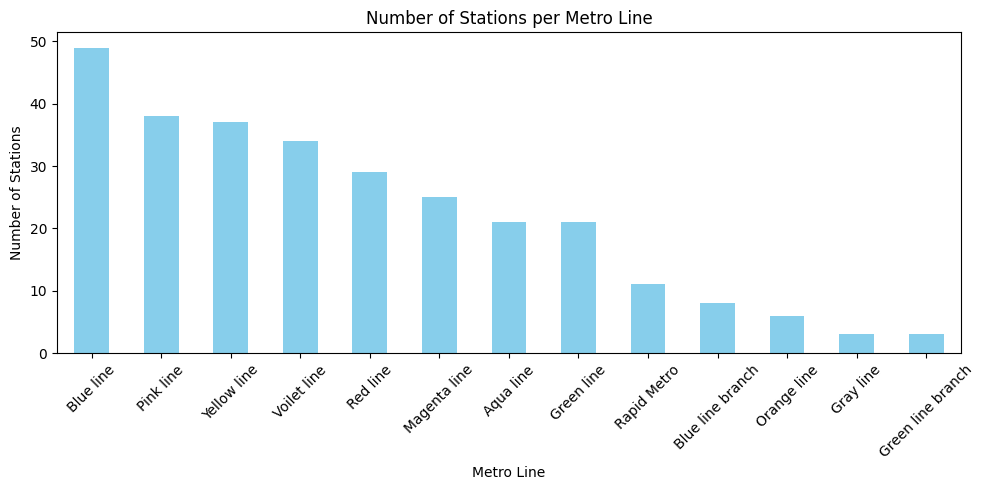

In [ ]:
plt.figure(figsize=(10,5))
df['Line'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Stations per Metro Line')
plt.xlabel('Metro Line')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-18-3099505332>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


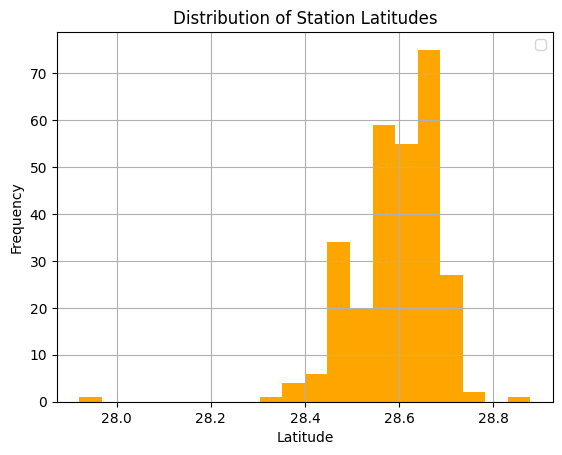

In [ ]:
if 'Latitude' in df.columns:
    plt.hist(df['Latitude'].dropna(), bins=20, color='orange')
    plt.title('Distribution of Station Latitudes')
    plt.xlabel('Latitude')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()


<ipython-input-14-1821556686>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


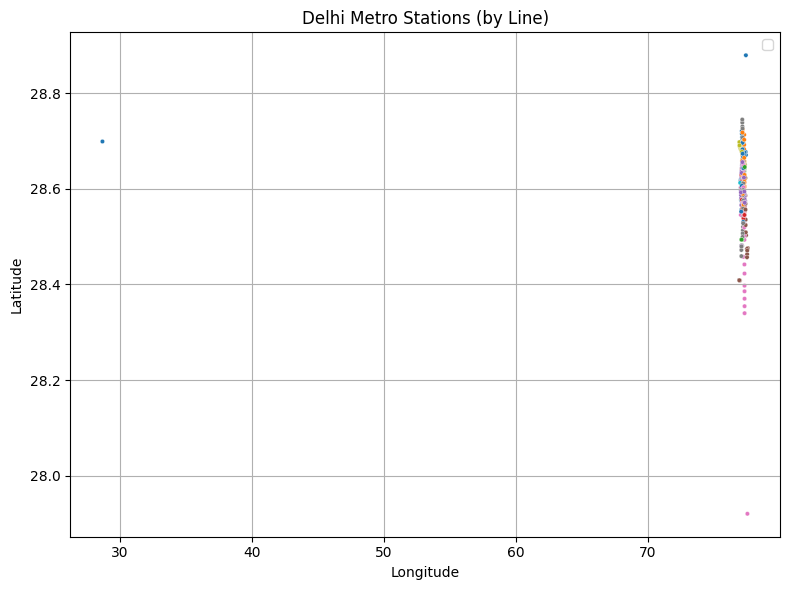

In [ ]:
# 2️⃣ Geospatial scatter ⬇️
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Longitude', y='Latitude',
                hue='Line', palette='tab10', legend=False, s=10)
plt.title("Delhi Metro Stations (by Line)")
plt.xlabel("Longitude"); plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

<ipython-input-13-3537607844>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_counts.index, y=year_counts.values, palette="viridis")
<ipython-input-13-3537607844>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper right")


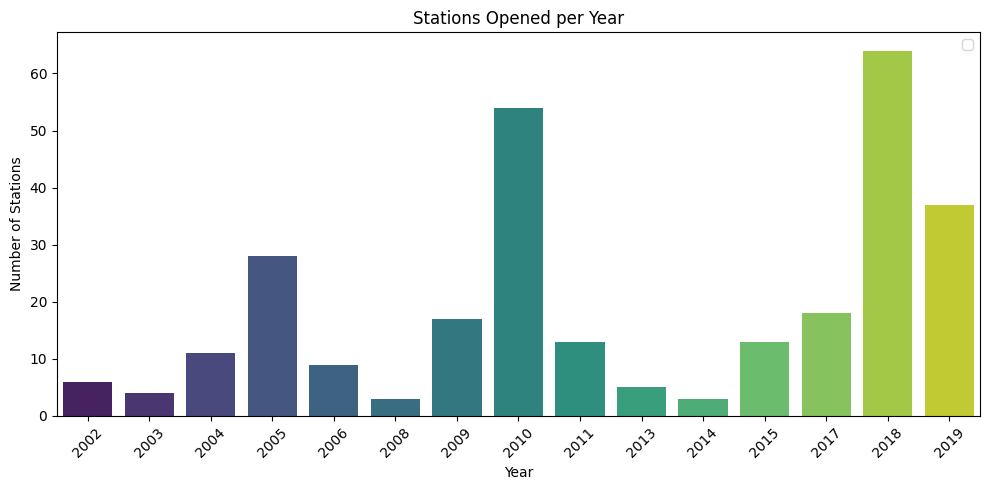

In [ ]:
# 3️⃣ Temporal analysis ⬇️
year_counts = df['Opening Year'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=year_counts.index, y=year_counts.values, palette="viridis")
plt.title("Stations Opened per Year")
plt.xlabel("Year"); plt.ylabel("Number of Stations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc="upper right")
plt.show()

In [ ]:

# 4️⃣ Line analysis ⬇️
stations_per_line = df['Line'].value_counts()
total_dist = df.groupby('Line')['Distance from Start (km)'].max()
avg_dist = total_dist / (stations_per_line - 1)


<ipython-input-10-3392057342>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=line_df.index, x='stations', data=line_df, ax=axes[0], palette="magma")
<ipython-input-10-3392057342>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=line_df.index, x='avg_dist_km', data=line_df, ax=axes[1], palette="cool")


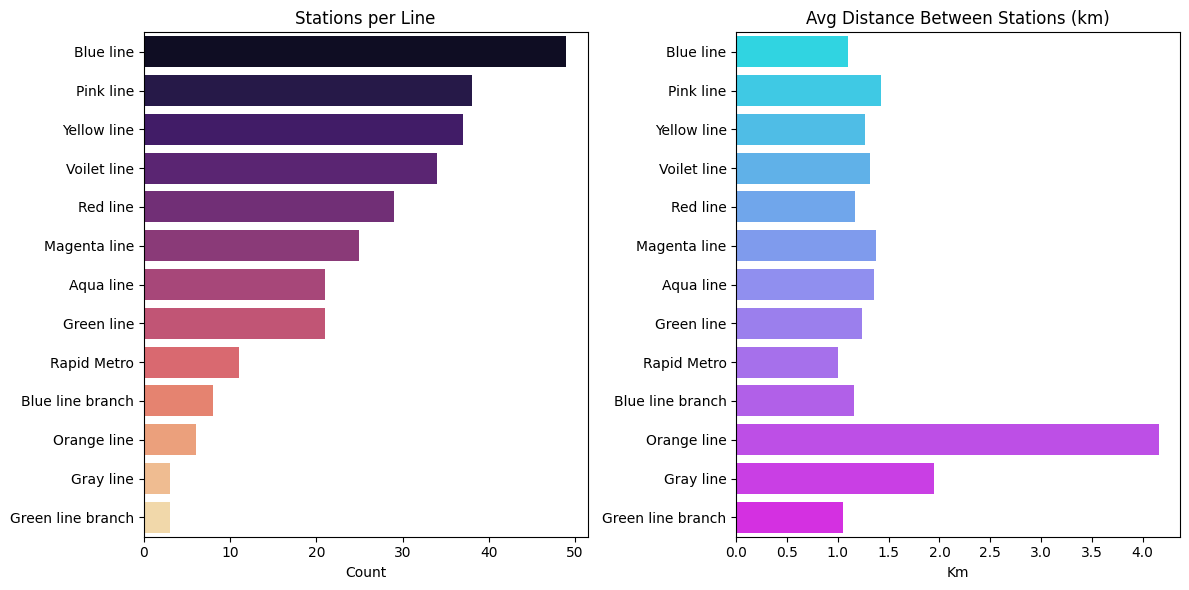

In [ ]:
line_df = pd.DataFrame({
    'stations': stations_per_line,
    'avg_dist_km': avg_dist
}).sort_values('stations', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(y=line_df.index, x='stations', data=line_df, ax=axes[0], palette="magma")
axes[0].set_title("Stations per Line"); axes[0].set_xlabel("Count"); axes[0].set_ylabel("")
sns.barplot(y=line_df.index, x='avg_dist_km', data=line_df, ax=axes[1], palette="cool")
axes[1].set_title("Avg Distance Between Stations (km)")
axes[1].set_xlabel("Km"); axes[1].set_ylabel("")
plt.tight_layout()
plt.show()

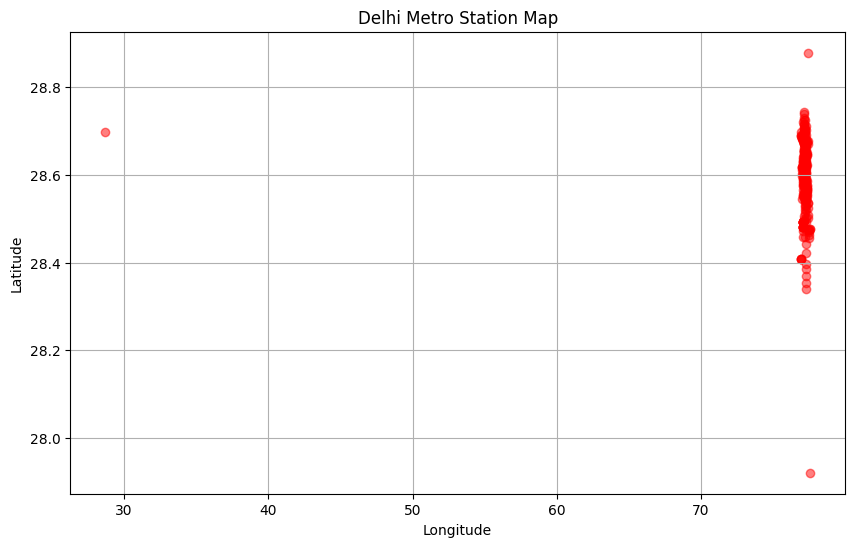

In [ ]:
if {'Latitude', 'Longitude'}.issubset(df.columns):
    plt.figure(figsize=(10,6))
    plt.scatter(df['Longitude'], df['Latitude'], c='red', alpha=0.5)
    plt.title('Delhi Metro Station Map')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()


Elevated Stations: The majority of the stations are Elevated. It is a common design choice in urban areas to save space and reduce land acquisition issues.

Underground Stations: The Underground stations are fewer compared to elevated ones. These are likely in densely populated or central areas where above-ground construction is less feasible.

At-Grade Stations: There are only a few At-Grade (ground level) stations, suggesting they are less common in the network, possibly due to land and traffic considerations.

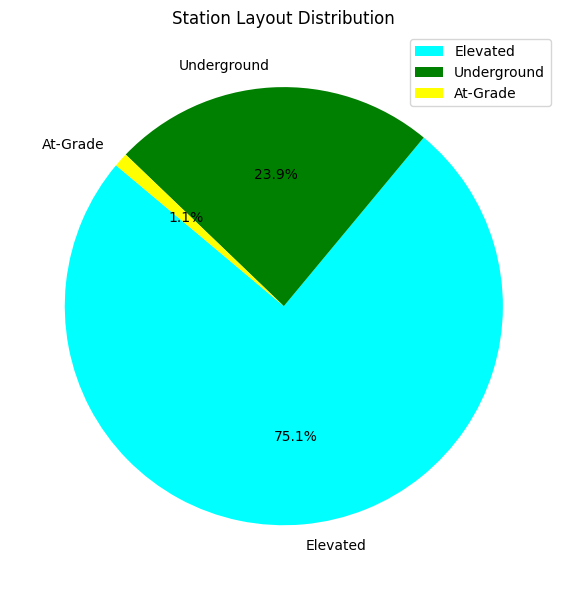

In [25]:

# 5️⃣ Station layout distribution ⬇️
layout_counts = df['Station Layout'].value_counts()

plt.figure(figsize=(6, 6))
layout_counts.plot(kind='pie', autopct="%1.1f%%", startangle=140, colors=['cyan','green','yellow'])
plt.title("Station Layout Distribution")
plt.ylabel("")
plt.tight_layout()
plt.legend(loc="upper right")
plt.show()